# Computational Linear Algebra
### Using SVD for image compression
Juan Camilo Sarmiento - Equinox - Plan Semilla - Data Science

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

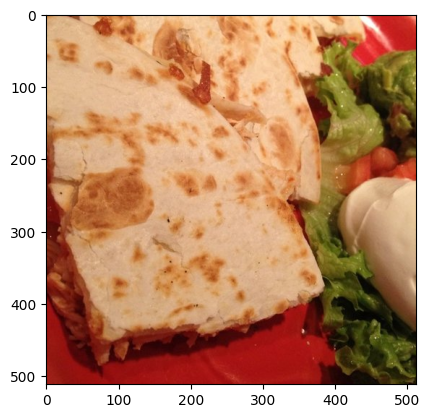

In [78]:
images_path=os.path.join(os.getcwd(),"Images_comp")
images=[]
images.extend(cv2.imread(img_path) for img_path in glob.glob(os.path.join(images_path,"*.jpg")))
# for i,image in enumerate(images):
#     images[i]=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB))

In [79]:
def compress_image_1ch(percentage,image):
    # print(image.shape)
    U,S,V=np.linalg.svd(image,full_matrices=False)
    S=np.diag(S)
    i=int(S.shape[0]*percentage)
    compressed=np.matmul(U[:,:i],np.matmul(S[:i,:i],V[:i,:]))
    compressed=np.clip(compressed,0,255)
    compressed=compressed.astype(np.uint8)
    return compressed,U,S,V
    
def compress_image_3ch(percentage,image):
    compressed=image.copy()
    compressed[:,:,0],_,_,_=compress_image_1ch(percentage,image[:,:,0])
    compressed[:,:,1],_,_,_=compress_image_1ch(percentage,image[:,:,1])
    compressed[:,:,2],_,_,_=compress_image_1ch(percentage,image[:,:,2])
    return compressed


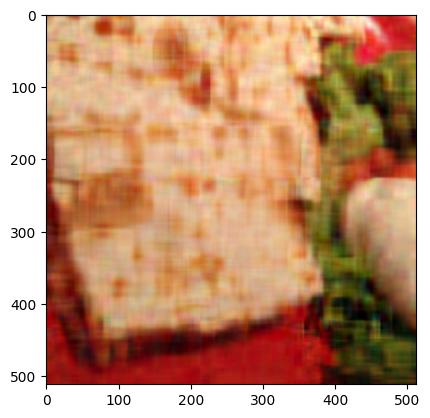

In [84]:
test_image=compress_image_3ch(0.03,images[0])
cv2.imwrite(os.path.join(os.getcwd(),"Images_comp","image0_3percent.jpg"),test_image,[cv2.IMWRITE_JPEG_QUALITY,100])
plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))

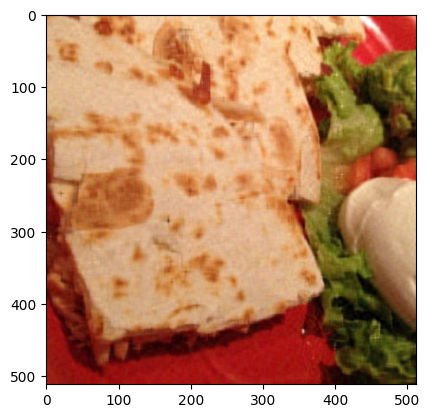

In [85]:
test_image=compress_image_3ch(0.1,images[0])
cv2.imwrite(os.path.join(os.getcwd(),"Images_comp","image0_10percent.jpg"),test_image,[cv2.IMWRITE_JPEG_QUALITY,100])
plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))